In [3]:
from fbprophet import Prophet
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
#univariate

ModuleNotFoundError: No module named 'fbprophet'

(39, 2)


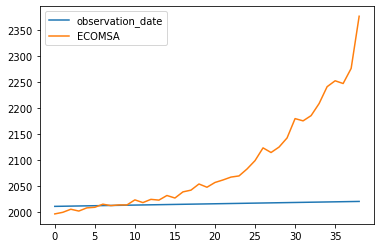

In [148]:
turkey = pd.read_excel("TurkeyData.xlsx",header=0)
turkey.plot()
print(turkey.shape)
pyplot.show()

In [149]:
turkey.columns = ['ds', 'y']
turkey
turkey['ds']= pd.to_datetime(turkey['ds'])

In [150]:
model = Prophet()

In [151]:
model.fit(turkey)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds           yhat     yhat_lower     yhat_upper
0 2023-01-01  181601.405781  174003.131643  189095.823600
1 2023-04-01  188187.429927  180465.479630  196103.345740
2 2023-07-01  197399.786436  189167.045491  205659.826713
3 2023-10-01  200779.079616  191441.034888  210712.256492


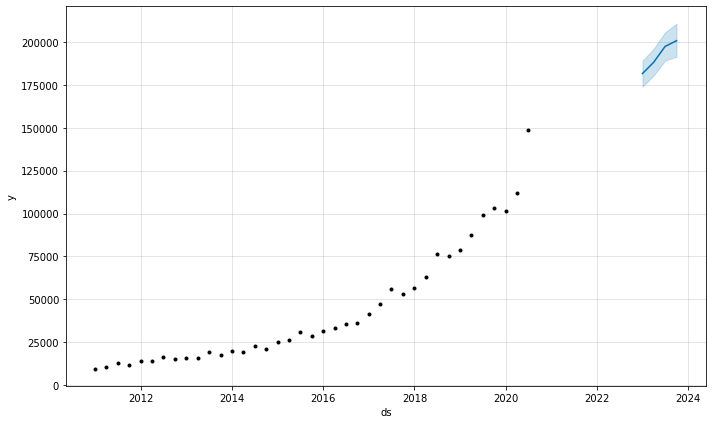

In [152]:
# define the period for which we want a prediction
future = list()
for i in range(1,13,3):
	date = '2023-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
# plot forecast
model.plot(forecast)
pyplot.show()

           ds         y
22 2016-07-01  35564.10
23 2016-10-01  36377.03
24 2017-01-01  41252.10
25 2017-04-01  47138.21
26 2017-07-01  56096.90


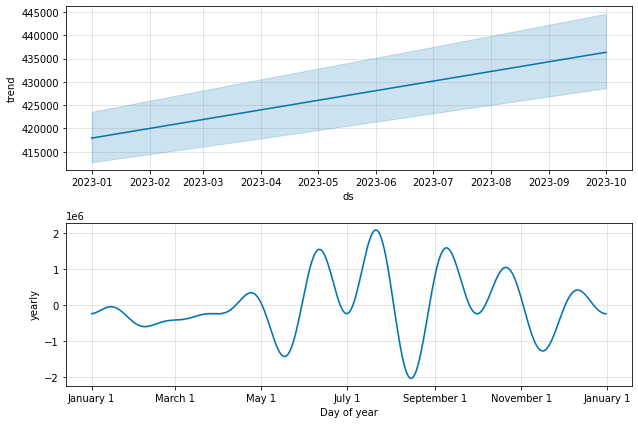

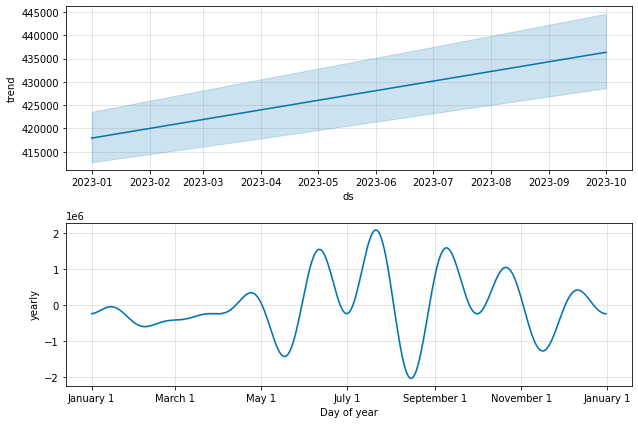

In [159]:
# create test dataset, remove last 12 months
train = turkey.drop(turkey.index[-12:])
print(train.tail())
model.plot_components(forecast)

In [158]:
from sklearn.metrics import mean_absolute_error
# calculate MAE between expected and predicted values for december
y_true = turkey['y'][-12:].values
y_pred = forecast['yhat'][-2:].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

ValueError: Found input variables with inconsistent numbers of samples: [12, 2]

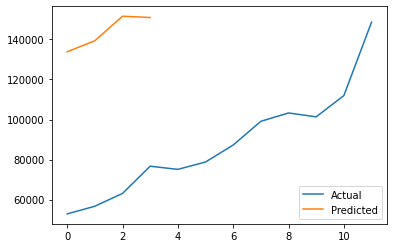

In [91]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()